In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = albalone_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_nominal_features(data_1)
data_3 = data_processor.encode_ordinal_features(data_2)
data_4 = data_processor.standardize_data(data_3,data_3,features=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

In [3]:
data_4 = data_4[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Sex_F', 'Sex_I', 'Sex_M','Rings']]

In [4]:
data_4

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
0,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,0,0,1,15
1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,0,0,1,7
2,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,1,0,0,9
3,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,0,0,1,10
4,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.341468,0.424414,0.609261,0.118799,0.047902,0.532836,0.073053,1,0,0,11
4173,0.549640,0.323648,-0.107978,0.279896,0.358765,0.309325,0.155666,0,0,1,10
4174,0.632909,0.676328,1.565580,0.708127,0.748470,0.975296,0.496895,0,0,1,9
4175,0.841081,0.777094,0.250642,0.541933,0.773248,0.733540,0.410690,1,0,0,10


In [5]:
data_train, data_val = cross_validator.random_partition(data_4, random_state=42)

In [6]:
data = data_train.to_numpy()
X_train = data[:,:-1]
y_train = data[:,-1:]

In [7]:
data_test = data_val.to_numpy()
X_val = data_test[:,:-1]
y_val = data_test[:,-1:]

In [8]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=4)

autoE.train(X_train, max_epochs=10000, lr=0.0001)

Epoch 0/10000, Loss: 0.7720499368020644
Epoch 1/10000, Loss: 0.7685459257430316
Epoch 2/10000, Loss: 0.7672097846744548
Epoch 3/10000, Loss: 0.7650844016959322
Epoch 4/10000, Loss: 0.7608173713278371
Epoch 5/10000, Loss: 0.7523858694471477
Epoch 6/10000, Loss: 0.7366514335021374
Epoch 7/10000, Loss: 0.7099835733505618
Epoch 8/10000, Loss: 0.6704840784794099
Epoch 9/10000, Loss: 0.6202899931574742
Epoch 10/10000, Loss: 0.5648670688803212
Epoch 11/10000, Loss: 0.5098544305692599
Epoch 12/10000, Loss: 0.4589476628741976
Epoch 13/10000, Loss: 0.4138264473892315
Epoch 14/10000, Loss: 0.3748855071950087
Epoch 15/10000, Loss: 0.34185749424203155
Epoch 16/10000, Loss: 0.3141762199829165
Epoch 17/10000, Loss: 0.2911689636271473
Epoch 18/10000, Loss: 0.2721564797663814
Epoch 19/10000, Loss: 0.2565033089369853
Epoch 20/10000, Loss: 0.2436405401384792
Epoch 21/10000, Loss: 0.23307316928397648
Epoch 22/10000, Loss: 0.22437902641431323
Epoch 23/10000, Loss: 0.21720336252724906
Epoch 24/10000, Loss: 

In [9]:
combined = CombinedModel(autoE,n_hidden_2=24,n_output=1)

MSEs, val_metrics, final_mse = combined.train(X_train,y_train,X_val,y_val,epochs=3000,lr=0.00001)

Epoch 0/3000, Train MSE: 102.62961098533673, Val MSE: 102.12328173387444
Epoch 100/3000, Train MSE: 6.469362908668266, Val MSE: 6.66590485109453
Epoch 200/3000, Train MSE: 6.027763499273793, Val MSE: 6.196039525230309
Epoch 300/3000, Train MSE: 5.377638594835044, Val MSE: 5.613471088803916
Epoch 400/3000, Train MSE: 4.931549614844105, Val MSE: 5.295250747995129
Epoch 500/3000, Train MSE: 4.734091173113123, Val MSE: 5.106418332325372
Epoch 600/3000, Train MSE: 4.644893783590978, Val MSE: 4.983747556090704
Epoch 700/3000, Train MSE: 4.591560326331091, Val MSE: 4.899636506634594
Epoch 800/3000, Train MSE: 4.552506352289878, Val MSE: 4.836444662461358
Epoch 900/3000, Train MSE: 4.521105573549983, Val MSE: 4.78601650705184
Epoch 1000/3000, Train MSE: 4.4946890675369735, Val MSE: 4.7440874019997805
Epoch 1100/3000, Train MSE: 4.471893761344162, Val MSE: 4.708310804804509
Epoch 1200/3000, Train MSE: 4.451873189719236, Val MSE: 4.677275731625856
Epoch 1300/3000, Train MSE: 4.434032524826144, V

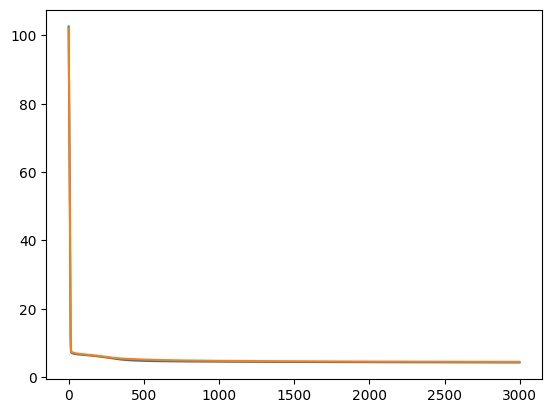

In [10]:
import matplotlib.pyplot as plt

plt.plot(MSEs)
plt.plot(val_metrics)

In [11]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=24,n_hidden_2=24,n_output=1)

MSEs, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,3000,0.000001)

Epoch 0/3000, Train MSE: 108.51706899349422, Val MSE: 107.97760583918334
Epoch 100/3000, Train MSE: 59.71893889018233, Val MSE: 59.495177663122575
Epoch 200/3000, Train MSE: 16.723020758344227, Val MSE: 16.904036576926945
Epoch 300/3000, Train MSE: 6.488658650740442, Val MSE: 6.673734961144166
Epoch 400/3000, Train MSE: 6.274927332156854, Val MSE: 6.452560282166084
Epoch 500/3000, Train MSE: 6.07085530550369, Val MSE: 6.246389468991972
Epoch 600/3000, Train MSE: 5.854342876875331, Val MSE: 6.0336449768656735
Epoch 700/3000, Train MSE: 5.624442328347466, Val MSE: 5.816817181471418
Epoch 800/3000, Train MSE: 5.3985676858023774, Val MSE: 5.61645915062773
Epoch 900/3000, Train MSE: 5.209667033644155, Val MSE: 5.463816777244109
Epoch 1000/3000, Train MSE: 5.078518833059719, Val MSE: 5.370862111523868
Epoch 1100/3000, Train MSE: 4.997679181366773, Val MSE: 5.32046987689357
Epoch 1200/3000, Train MSE: 4.949043020100117, Val MSE: 5.290784703112191
Epoch 1300/3000, Train MSE: 4.918861240752636,

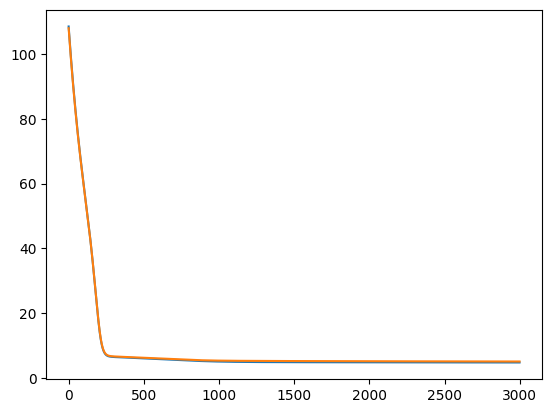

In [12]:
import matplotlib.pyplot as plt

plt.plot(MSEs)
plt.plot(val_metrics)

In [13]:
linear = LinearNetwork(config)

losses = linear.linear_regression(X_train,y_train,X_val,y_val)

Epoch 0/1000, Training MSE: 108.81728934327207, Validation MSE: 102.35382925159597
Epoch 100/1000, Training MSE: 6.515420435166748, Validation MSE: 6.577037368447036
Epoch 200/1000, Training MSE: 5.607598985356345, Validation MSE: 5.690990815314824
Epoch 300/1000, Training MSE: 5.343186659995282, Validation MSE: 5.436553765919957
Epoch 400/1000, Training MSE: 5.187264958258369, Validation MSE: 5.294070640872594
Epoch 500/1000, Training MSE: 5.090901929241365, Validation MSE: 5.210942588782531
Epoch 600/1000, Training MSE: 5.029735549940988, Validation MSE: 5.161362200996047
Epoch 700/1000, Training MSE: 4.990038226265255, Validation MSE: 5.131254817700824
Epoch 800/1000, Training MSE: 4.9636783932303095, Validation MSE: 5.1125983434617215
Epoch 900/1000, Training MSE: 4.945703911453724, Validation MSE: 5.100698810768204


In [14]:
autoE.W_encoder

array([[ 0.49216973,  0.2049786 , -0.16704527,  0.34803089],
       [ 0.49702341,  0.28020835, -0.23823268,  0.31378903],
       [ 0.45890554,  0.33123126, -0.35887304,  0.34959622],
       [ 0.05678752,  0.02841593,  0.48260954,  0.10684981],
       [ 0.00731791, -0.1306587 ,  0.70255823,  0.12556617],
       [-0.04973651,  0.16967288,  0.56427335, -0.01201316],
       [ 0.1513401 ,  0.13880652,  0.29176282,  0.18161323],
       [ 0.36031412,  1.06005167, -0.18296348, -1.56757656],
       [ 1.6891627 , -1.37540255, -0.07091926, -0.07268954],
       [-1.73711479,  0.68189043, -0.58737727,  1.36222816]])